In [24]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, precision_score,recall_score, f1_score
from sklearn.metrics import roc_curve, auc


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from matplotlib.legend_handler import HandlerLine2D

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier



import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [6]:
df = pd.read_csv('Preprocessed_02.csv', index_col='Customer_No')

In [7]:
df.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,
1,3,38,100.0,5,0.0,1,0.285714,0.428571,19.0,0.750,46,0,5527.0,15,0
2,1,68,100.0,1,0.0,1,0.000000,0.200000,2.0,0.500,33,0,12104.0,2,0
3,1,39,50.0,3,0.0,1,0.200000,0.200000,25.0,1.000,28,1,153179.0,8,0
4,0,76,100.0,0,0.0,0,0.000000,0.000000,0.0,0.500,26,2,181589.0,6,0
5,3,23,33.0,11,0.0,1,0.250000,0.250000,19.0,0.375,28,1,10661.0,8,0


In [11]:
X = df.drop(columns='Target_Flag')
y = df['Target_Flag']

In [15]:
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X, y)



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=10)

In [19]:
def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [20]:
def get_roc_auc(y_test, predicted_proba):
    fpr, tpr, _ = roc_curve(y_test, predicted_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Logistic Regression auc: 0.509 +/- 0.003


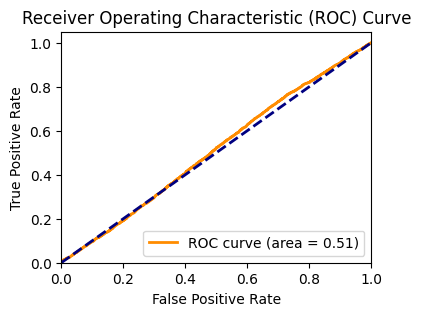

Accuracy (None): 49.71%


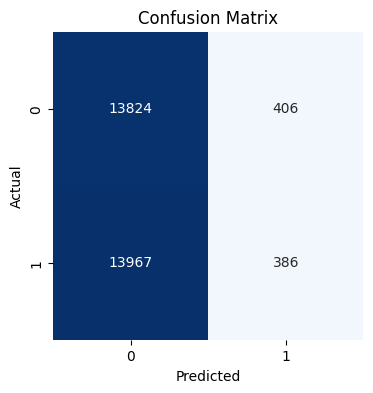

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.50      0.97      0.66     14230
           1       0.49      0.03      0.05     14353

    accuracy                           0.50     28583
   macro avg       0.49      0.50      0.35     28583
weighted avg       0.49      0.50      0.35     28583

Accuracy: 0.497
Precision: 0.487
Recall: 0.027
F1-score: 0.051

Decision Tree auc: 0.914 +/- 0.002


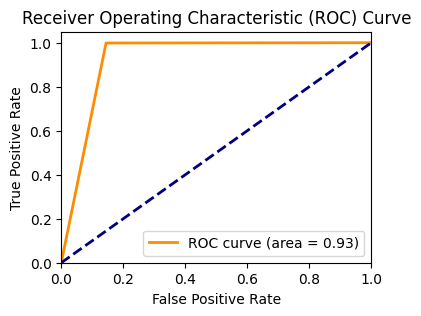

Accuracy (None): 92.74%


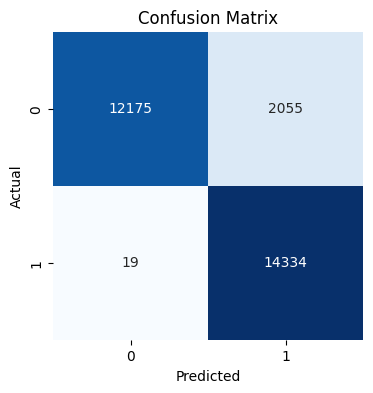

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.86      0.92     14230
           1       0.87      1.00      0.93     14353

    accuracy                           0.93     28583
   macro avg       0.94      0.93      0.93     28583
weighted avg       0.94      0.93      0.93     28583

Accuracy: 0.927
Precision: 0.875
Recall: 0.999
F1-score: 0.933

Random Forest auc: 0.997 +/- 0.001


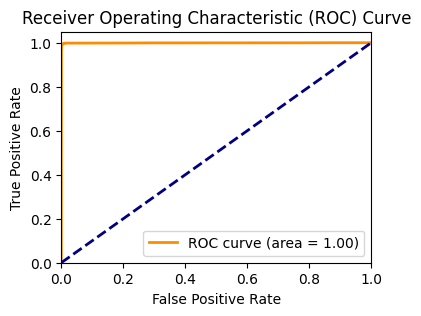

Accuracy (None): 98.29%


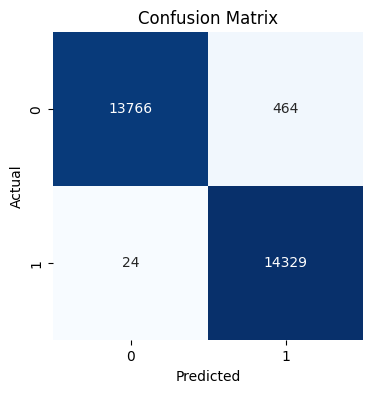

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     14230
           1       0.97      1.00      0.98     14353

    accuracy                           0.98     28583
   macro avg       0.98      0.98      0.98     28583
weighted avg       0.98      0.98      0.98     28583

Accuracy: 0.983
Precision: 0.969
Recall: 0.998
F1-score: 0.983



In [27]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBClassifier':XGBClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
    
}

# Train and evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(f"{name} auc: {scores.mean():.3f} +/- {scores.std():.3f}")
    
    # Fit the model to the full training set and make predictions on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    get_roc_auc(y_test, y_proba[:,1])

    evaluate_model(model, 'None', X_test, y_test)
    
    # Evaluate the model on the test set
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-score: {f1:.3f}")
    print()

In [25]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.sample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output ($n_{class}=64)$")
pass

In [ ]:
def learning_curve(X, y, observations=range(1, 65)):
    scores = []
    for n in observations:
        rus = RandomUnderSampler(random_state=0, ratio={0: n, 1: n, 2: n})
        rus.fit(X, y)
        X_resampled, y_resampled = rus.sample(X, y)
        score = LinearSVC().fit(X_resampled, y_resampled).score(X, y)
        scores.append(score)
    return scores

plt.plot(range(1, 65), learning_curve(X, y), linewidth=4)
plt.title("RandomUnderSampler Learning Curve", fontsize=16)
plt.gca().set_xlabel("# of Points per Class", fontsize=14)
plt.gca().set_ylabel("Training Accuracy", fontsize=14)
sns.despine()
pass